### Desafío - Dimensionalidad y Agrupación (I)

<br>
<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


### Contexto

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupolisidad, Extroversión, Neuroticismo, Apertura. Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente.

Las 25 preguntas son:
* A1 Soy indiferente a los sentimientos de otros.
* A2 Me preocupo del bienestar de otros.
* A3 Sé cómo confortar a otros.
* A4 Me agradan los niños.
* A5 Hago sentir tranquila a la gente.
* C1 Soy exacto en mi trabajo.
* C2 Sigo con mis tareas hasta que todo esté perfecto.
* C3 Hago cosas siguiendo un plan.
* C4 Hago cosas con el mínimo esfuerzo.
* C5 Pierdo mi tiempo.
* E1 No hablo mucho con las personas.
* E2 Me es dificil acercarme a otros.
* E3 Sé cómo cautivar gente.
* E4 Hago amigos de forma fácil.
* E5 Puedo tomar el cargo de las cosas.
* N1 Me enojo con facilidad.
* N2 Me irrito con facilidad.
* N3 Tengo cambios de humor frecuentes.
* N4 Usualmente me siento melancólico.
* N5 Entro en pánico con facilidad.
* O1 Estoy lleno de ideas.
* O2 Evito leer material difícil.
* O3 Tiendo a llevar la conversación a niveles más altos.
* O4 Dedico tiempo a la reflexión de cosas.
* O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:
* gender Hombre = 1, Mujer =2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* age Edad en Años.


Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.


### Desafío 1: Lectura de archivos

Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
Importe la base de datos bfi.csv y asígnela a un objeto df.
Solicite las primeras 5 observaciones con head.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import factor_analyzer as factor
import missingno as msngo

plt.style.use('seaborn')
df = pd.read_csv('bfi.csv').drop('Unnamed: 0', axis=1)
df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
* Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

<Figure size 288x288 with 0 Axes>

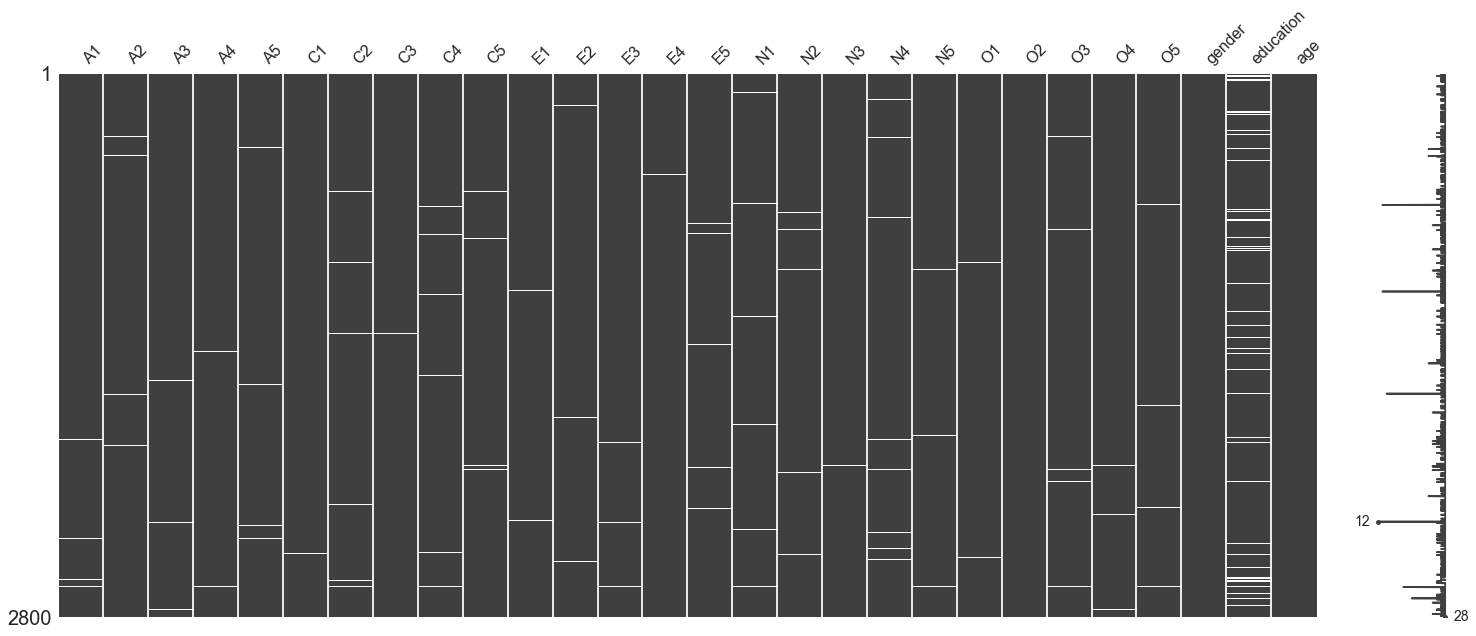

In [30]:
plt.figure(figsize=(4,4))
msngo.matrix(df)

In [31]:
for colname, serie in df.iteritems():
    if serie.isna().value_counts('%')[False] == 1.0:
        print(colname, 0.0)
    else:
        print(colname, serie.isna().value_counts('%')[True].round(3))

A1 0.006
A2 0.01
A3 0.009
A4 0.007
A5 0.006
C1 0.008
C2 0.009
C3 0.007
C4 0.009
C5 0.006
E1 0.008
E2 0.006
E3 0.009
E4 0.003
E5 0.008
N1 0.008
N2 0.008
N3 0.004
N4 0.013
N5 0.01
O1 0.008
O2 0.0
O3 0.01
O4 0.005
O5 0.007
gender 0.0
education 0.08
age 0.0


### Las principales variables  con mayores tasas de valores perdidos son: education, N4, A2, N5 y O3

In [32]:
df_clean = df.dropna()

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap .
* Comente sobre los principales patrones de correlación entre las preguntas de la batería.

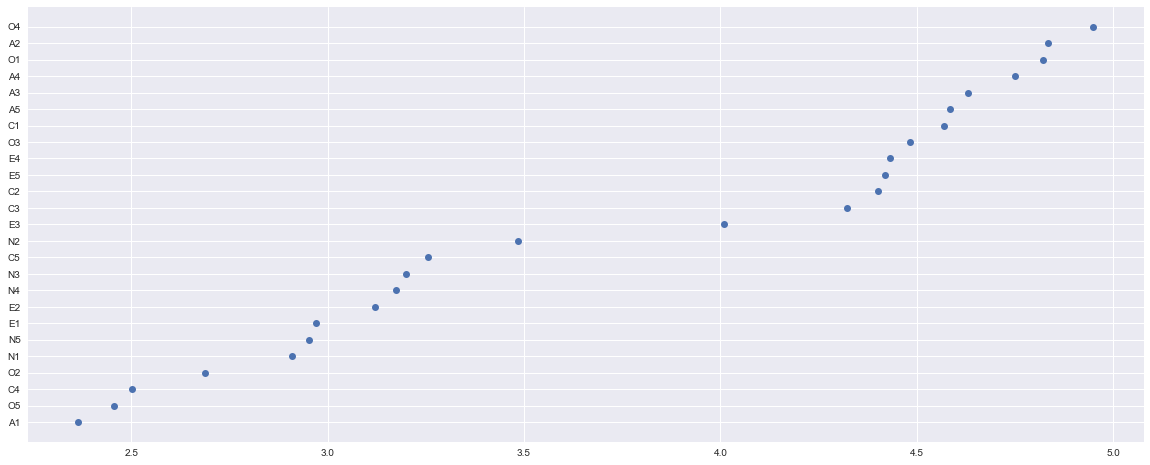

In [42]:
df_preguntas = df_clean.loc[:, "A1":"O5"]

variable = []
mean = []
for colname, serie in df_preguntas.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.figure(figsize=(20,8))
plt.plot(df_mean['mean'], df_mean['var'], 'o')

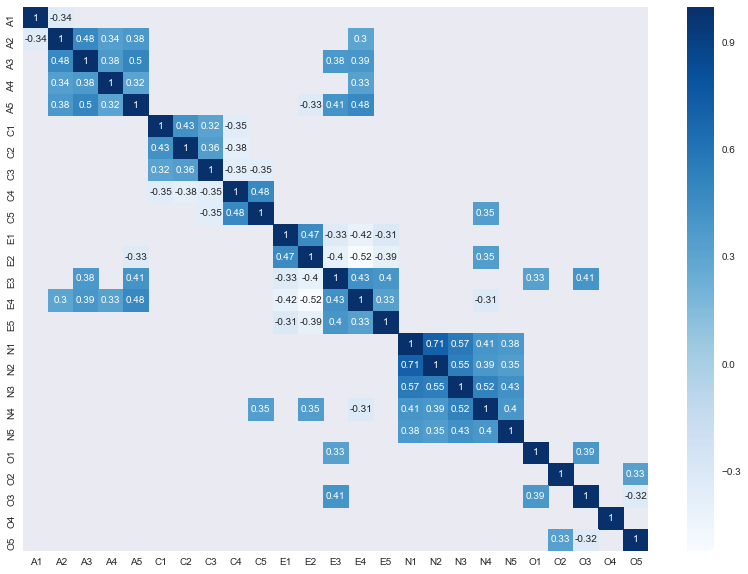

In [59]:
plt.figure(figsize=(14,10))
corr_mat = df_preguntas.corr()
sns.heatmap(corr_mat[abs(corr_mat) >= 0.3], cmap='Blues', annot=True)

#### En el gráfico anterior se observan algunos grupos de variables correlacionadas. Los principales grupos son:
* A2, A3, A4, A5 (Amabilidad)
* C1, C2, C3, C4, C5 (Escrupolisidad)
* E1, E2, E3, E4, E5 (Extroversión)
* N1, N2, N3, N4, N5 (Neuroticismo)


### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-MeyerOlkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con FactorAnalyzer() con rotacion (rotacion = 'promax') y la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [68]:
# prueba de esferacidad
print(factor.calculate_bartlett_sphericity(df_preguntas))
# prueba KMO
print(factor.calculate_kmo(df_preguntas))

(16509.6735504972, 0.0)
(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
       0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
       0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
       0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
       0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]), 0.8468295031833752)


#### Comentarios:
* Al realizar la prueba de esferacidad de Barlett se decide rechazar la hipótesis nula y continuar con la extracción de factores dado el p-value igual a 0.0.
* Al realizar la prueba KMO obtenemos un puntaje global de 0.85 lo que nos confirma que podemos continuar con la extracción de factores dado el puntaje global mayor a 0.7. Se observa que a nivel de variables todas presentan puntajes sobre 0.7 por lo que son significativas para las correlaciones parciales dentro de la matriz.

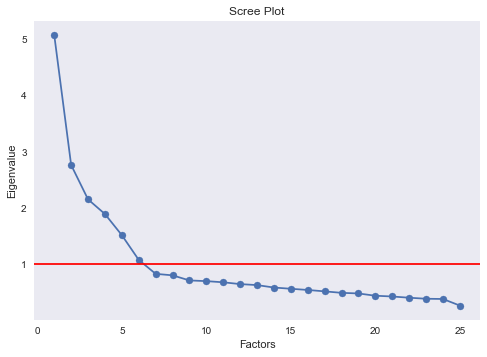

In [75]:
fa = factor.FactorAnalyzer(n_factors=10, rotation = None)
fa.fit(df_preguntas)

# Check Eigenvalues - Reportan que tanta varianza se puede atribuir un factor específico
ev, v = fa.get_eigenvalues()
# La cantidad de factores a generar será igual a los factores con un ev mayor a 1.
plt.scatter(range(1, df_preguntas.shape[1]+1), ev)
plt.plot(range(1, df_preguntas.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1, color="r")
plt.grid()
plt.show()

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
*  Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:


$${y}={{\beta }_{0} + {\beta }_{1} \cdot {gender} + {\beta }_{2} \cdot {education} + {\beta }_{3} \cdot {age} +{\epsilon}_{i}}$$


<br>
Tips: Utilice statsmodels para la generación del modelo y comente que tan significativos son los regresores, estos  afectan positiva o negativamente el factor estimado?.
